In [1]:
import numpy as np
import pandas as pd


In [2]:
#import os
#for dirname, _, filenames in os.walk
#    print(dirname)

In [4]:
import os
from PIL import Image

In [14]:
from IPython.display import display  # to show the image in the notebook

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
folder_pathcloudy = "data/cloudy"

In [7]:
image_filescloud = [f for f in os.listdir(folder_pathcloudy) if f.endswith((".jpg"))]

In [8]:
image_filescloud[1]

'train_23953.jpg'

In [11]:
# for loop to get the sizes of the images
for image_file in image_filescloud:
    # Construct the full file path
    image_path = os.path.join(folder_pathcloudy, str(image_file))
    
    # Open the image
    image = Image.open(image_path)
    
    # Access image properties or perform operations
    width, height = image.size
    print("Image size: {}x{}".format(width, height))
    
    # Close the image
    image.close()
    

Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256


Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256


Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256


Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256
Image size: 256x256


In [24]:
#show the first image
first_image_path = os.path.join(folder_pathcloudy, image_filescloud[0])

    # Open the first image
first_image = Image.open(first_image_path)

    # Display the first image
first_image.show()

    # Close the image
first_image.close()




In [21]:
#show the first image in the notebook
# Open the image
#image = Image.open("data/clou/image.jpg")
#first_image = Image.open('data/cloudy/train_23953.jpg')
#first_image = first_image.convert("RGB")
# Display the image
#display(image)

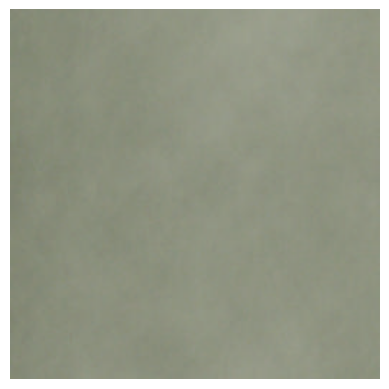

In [22]:


# Read the image file
image = mpimg.imread("data/cloudy/train_23953.jpg")

# Display the image
plt.imshow(image)
plt.axis("off")  # Optional: Turn off axis ticks and labels
plt.show()

In [26]:
# Path to the folder containing images
folder_pathcloudy
# Get a list of all the image filenames
image_filescloud = [f for f in os.listdir(folder_pathcloudy) if f.endswith((".jpg"))]
# Initialize an empty list to hold the image data
images = []
# Loop over each image
for image_filename in image_filescloud:
    # Open the image using PIL
    image = Image.open(os.path.join(folder_pathcloudy, image_filename))
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Append the image data to the list
    images.append(image_array)
# Convert the list of images to a numpy array
images = np.array(images)

In [30]:
print(display(images[1]))

array([[[125, 121, 140,   0],
        [123, 120, 138,   0],
        [121, 118, 135,   0],
        ...,
        [110, 106, 122,   0],
        [110, 106, 122,   0],
        [110, 106, 122,   0]],

       [[124, 120, 139,   0],
        [123, 119, 138,   0],
        [122, 118, 136,   0],
        ...,
        [110, 106, 123,   0],
        [111, 106, 123,   0],
        [111, 106, 123,   0]],

       [[123, 118, 138,   0],
        [123, 119, 137,   0],
        [123, 119, 137,   0],
        ...,
        [111, 106, 124,   0],
        [111, 106, 124,   0],
        [111, 106, 124,   0]],

       ...,

       [[123, 117, 139,   0],
        [123, 117, 139,   0],
        [123, 118, 138,   0],
        ...,
        [116, 110, 131,   0],
        [115, 109, 129,   0],
        [115, 109, 128,   0]],

       [[122, 116, 140,   0],
        [122, 117, 139,   0],
        [122, 117, 138,   0],
        ...,
        [114, 109, 129,   0],
        [115, 109, 129,   0],
        [115, 109, 128,   0]],

       [[121

None


In [34]:
pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 MB 2.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.3 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [38]:
from tqdm import tqdm
import torch.nn.parallel as parallel

In [39]:
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(64),
                                transforms.RandomVerticalFlip(),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()])

In [42]:
dataset = ImageFolder('data', transform=transform)

In [43]:
dataset[0][0].shape

torch.Size([3, 64, 64])

In [44]:
dataset.classes

['cloudy', 'desert', 'green_area', 'water']

In [45]:
len(dataset)

5631

In [48]:
from collections import Counter
value_counts = dict(Counter(dataset.targets))

In [49]:
value_counts = dict(zip(dataset.classes, value_counts.values()))

print(value_counts)

{'cloudy': 1500, 'desert': 1131, 'green_area': 1500, 'water': 1500}


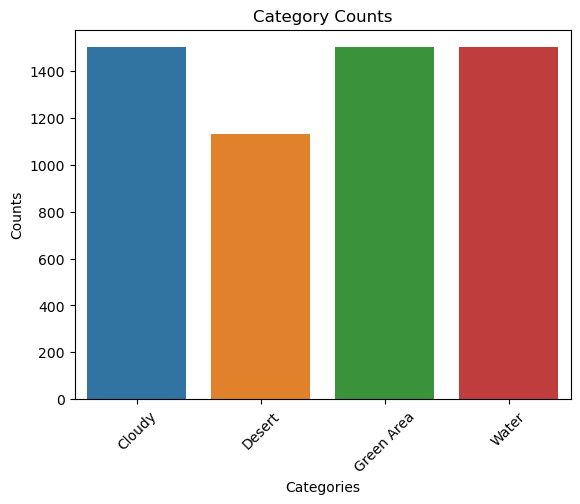

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=list(value_counts.keys()), y= list(value_counts.values()))
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Category Counts')
plt.xticks(range(4),labels = ["Cloudy", "Desert", "Green Area", "Water"], rotation = 45)
plt.show()

ValueError: too many values to unpack (expected 2)

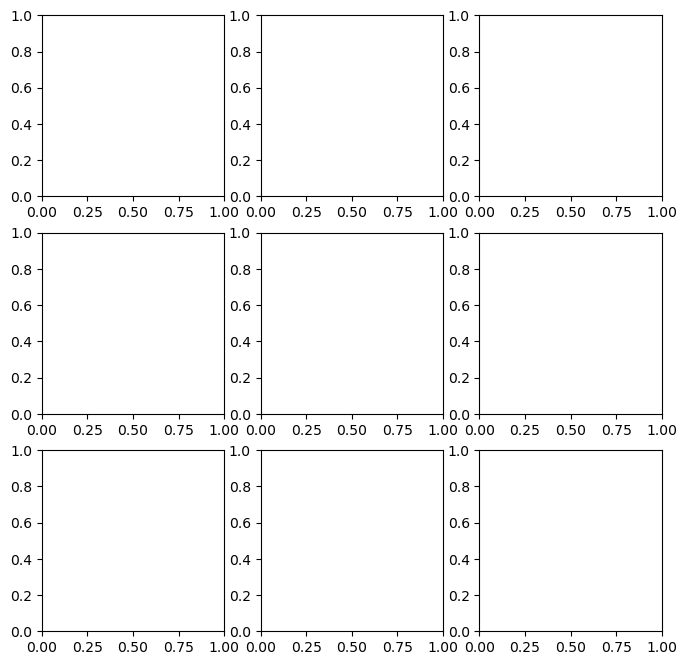

In [47]:
# Select a subset of images to plot
num_images = 9
subset_images = dataset[0][0]

# Create a figure and subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

# Iterate through the subset of images and plot them
for i, (image, label) in enumerate(subset_images):
    ax = axes[i // 3, i % 3]
    ax.imshow(image.permute(1, 2, 0))
    ax.axis('off')
    ax.set_title(dataset.classes[label])

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()
